In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Immobilienrechner-Challenge/data/main/clean.csv")
data = data[['price', 'zip_code', 'living_space', 'rooms', 'type']].copy()

In [3]:
data["type"].unique()

array(['penthouse', 'terrace-house', 'detached-house', 'flat',
       'stepped-house', 'farmhouse', 'semi-detached-house',
       'stepped-apartment', 'duplex-maisonette', 'attic-flat', 'loft',
       'chalet', 'villa', 'attic-room', 'secondary-suite', 'castle',
       'detached-secondary-suite', 'studio',
       'furnished-residential-property', 'rustico', 'single-room'],
      dtype=object)

In [4]:
print(len(data))
data

13069


,price,zip_code,living_space,rooms,type
0,1150000.0,5023,100.0,3.5,penthouse
1,1420000.0,5023,156.0,4.5,terrace-house
2,720000.0,5022,93.0,2.5,penthouse
3,1430000.0,5023,154.0,4.5,detached-house
4,995000.0,5022,142.0,4.5,flat
...,...,...,...,...,...
13064,1101000.0,8610,70.0,2.5,flat
13065,1750000.0,8604,NaN,8.0,semi-detached-house
13066,1415000.0,8472,150.0,6.5,terrace-house
13067,1465000.0,8483,145.0,6.0,detached-house


In [5]:
data.isna().sum().sort_values(ascending = False)

living_space    1069
price           1025
rooms            582
zip_code           0
type               0
dtype: int64

In [6]:
data = data.dropna()
len(data)

10923

In [7]:
y_cols = ["type"]
X_cols = list(set(data.columns) - set(y_cols))

X = data[X_cols].values
y = data[y_cols].values.ravel()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
scores = np.array([(i, KNeighborsClassifier(i).fit(X_train, y_train).score(X_test, y_test)) for i in tqdm(range(1, 32))])

100%|██████████| 31/31 [00:01<00:00, 29.17it/s]


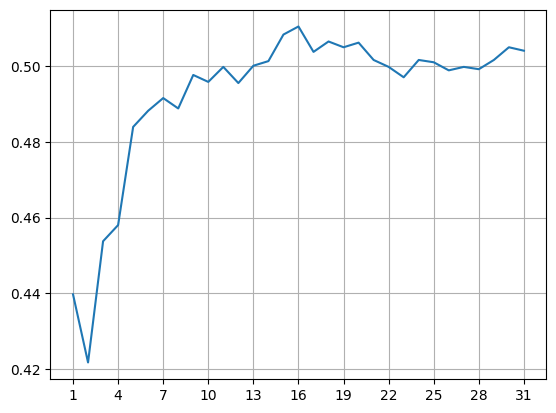

In [10]:
plt.plot(scores[:,0], scores[:,1])
plt.xticks(np.linspace(1, 31, 11))
plt.grid()
plt.show()

In [11]:
model = KNeighborsClassifier(16).fit(X_train, y_train)

print("actual: ", y_test[:5])
print("predicted: ", model.predict(X_test[:5]))

actual:  ['detached-house' 'flat' 'flat' 'detached-house' 'flat']
predicted:  ['detached-house' 'flat' 'flat' 'detached-house' 'detached-house']
